# My Analysis

In [ ]:
data_dict = {}

with open('pollutionData.txt', 'r') as input_file:
    next(input_file)
    for line in input_file:
        values = line.strip().split('\t')
        key = (values[0], values[1])
        distance = float(values[5])

        if key in data_dict:
            existing_value = data_dict[key]
            if distance < existing_value[1] and distance < 400:
                data_dict[key] = (values[3], distance)
        elif distance < 400:
            data_dict[key] = (values[3], distance)

with open('smallest_dist.txt', 'w') as output_file:
    for key, value in data_dict.items():
        output_file.write(f"{key[0]}\t{key[1]}\t{value[0]}\t{value[1]}\n")


In [ ]:
# Map the pollution in smallest_dist.txt to the sample location in Sunagawa file using the enzyme id in both files
import pandas as pd

sunagawa_data = pd.read_excel('Sunagawa_TableS1.xlsx')

new_data = pd.read_csv('smallest_dist.txt', sep='\t', header=None)

# map 3rd column to 1st column
mapping_dict = dict(zip(sunagawa_data.iloc[1:, 2], sunagawa_data.iloc[1:, 0]))

# replace 2nd column with corresponding 1st column
new_data[1] = new_data[1].map(mapping_dict)

new_data.to_csv('mapped.txt', sep='\t', header=False, index=False)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<ipython-input-14-041397be718e>:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient, _ = pearsonr(x_values, y_values)


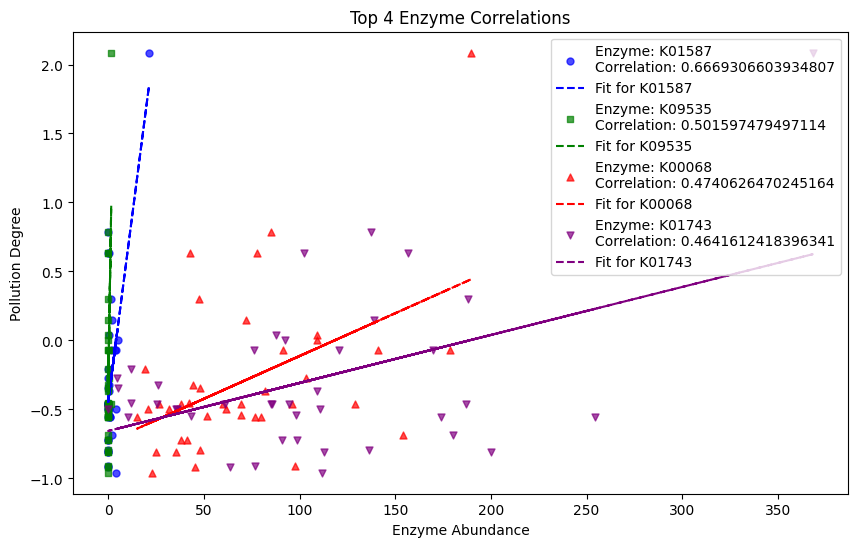

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Calculate the correlation between the x values (distance) and y values (abundance)
# Hypothesis: Enzyme abundance and pollution distance is correlated

def calculate_correlation(x_values, y_values):
    correlation_coefficient, _ = pearsonr(x_values, y_values)
    return correlation_coefficient

def plot_line_of_best_fit(x, y, color, label):
    # Fit a first-degree polynomial (line) to the data
    slope, intercept = np.polyfit(x, y, 1)

    # Plot the line of best fit
    plt.plot(x, slope * np.array(x) + intercept, color=color, linestyle='--', label=f'Fit for {label}')

release_df = pd.read_csv("TARA243.KO.profile.release", sep='\s+', skiprows=[1])

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

# Read all the second values and y values from mapped_data
second_values = mapped_data[1].values
y_values = mapped_data[2].values # abundance values from mapped_data

correlation_coefficients = {}
for row_index in range(len(release_df)):
    x_values = [release_df.iloc[row_index][str(second_value)] for second_value in second_values]

    correlation_coefficient = calculate_correlation(x_values, y_values)
    correlation_coefficients[row_index] = correlation_coefficient

# Sort the coefficients and row indices from highest to lowest
sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True)

# Now, sorted_coefficients is a list of (row_index, correlation_coefficient) tuples, sorted by the coefficient in descending order

# Create a list to store the first column values from the release file
first_column_values = release_df.iloc[:, 0].values

# Save the sorted coefficients and row indices along with the corresponding first values
with open("sorted_coefficients.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        first_value = first_column_values[row_index]  # Get the corresponding first value
        file.write(f"Row {row_index}: Enzyme = {first_value}, Correlation = {correlation_coefficient}\n")

colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot scatter graph for the top 10 correlations with different colors and shapes for each enzyme
top_n = 4

# Using different shapes for each enzyme
markers = ['o', 's', '^', 'v']

plt.figure(figsize=(10, 6))

for i in range(min(top_n, len(sorted_coefficients))):
    row_index, correlation_coefficient = sorted_coefficients[i]
    first_value = first_column_values[row_index]
    x_values = [release_df.iloc[row_index][str(second_value)] for second_value in second_values]
    marker = markers[i]
    color = colors[i]

    plt.scatter(x_values, y_values, label=f'Enzyme: {first_value}\nCorrelation: {correlation_coefficient}',
                marker=marker, color=color, alpha=0.7, s=25)

    # Plot the line of best fit
    plot_line_of_best_fit(x_values, y_values, color, label=first_value)

plt.xlabel('Enzyme Abundance')
plt.ylabel('Pollution Degree')
plt.title(f'Top {top_n} Enzyme Correlations')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

file3_path = 'TARA243.KO.profile.release'
df3 = pd.read_csv(file3_path, delimiter='\t')

file2_path = 'mapped.txt'
df2 = pd.read_csv(file2_path, delimiter='\t', header=None, names=['ID', 'Sample', 'Value1', 'Value2'])

df_ko_filtered = df3.iloc[:, 0:1]

sample_names_to_keep = df2['Sample'].unique()
columns_to_keep_ko = [col for col in df3.columns if any(sample_name in col for sample_name in sample_names_to_keep)]
df_ko_filtered = pd.concat([df_ko_filtered, df3[columns_to_keep_ko]], axis=1)

output_ko_file_path = 'TARA243_KO_filtered.KO.profile.release'
df_ko_filtered.to_csv(output_ko_file_path, sep='\t', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('mapped.txt', sep='\t', header=None)
sorted_df = df.sort_values(by=2)
sorted_df.to_csv('mapped.txt', sep='\t', header=None, index=False)

In [ ]:
# Calculate the correlation between the x values (distance) and y values (abundance)
# Enzyme abundance and pollution distance is correlated
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def calculate_correlation(x_values, y_values):
    correlation_coefficient, _ = pearsonr(x_values, y_values)
    return correlation_coefficient

release_df = pd.read_csv("TARA243.KO.profile.release", delim_whitespace=True, skiprows=[1])

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

second_values = mapped_data[1].values
y_values = mapped_data[2].values

correlation_coefficients = {}
for row_index in range(len(release_df)):
    x_values = [release_df.iloc[row_index][str(second_value)] for second_value in second_values]

    desired_length = len(x_values)
    y_values_resized = np.resize(y_values, desired_length)

    correlation_coefficient = calculate_correlation(x_values, y_values_resized)
    correlation_coefficients[row_index] = correlation_coefficient

sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True)

# Now, sorted_coefficients is a list of (row_index, correlation_coefficient) tuples, sorted by the coefficient in descending order

first_column_values = release_df.iloc[:, 0].values

with open("sorted_coefficients.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        first_value = first_column_values[row_index]
        file.write(f"Row {row_index}: Enzyme = {first_value}, Correlation = {correlation_coefficient}\n")


<ipython-input-60-113dcb5b44f5>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  release_df = pd.read_csv("TARA243.KO.profile.release", delim_whitespace=True, skiprows=[1])
<ipython-input-60-113dcb5b44f5>:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient, _ = pearsonr(x_values, y_values)


# T-Distribution

In [ ]:
import numpy as np
import scipy.stats as stats

def calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom):
    x = correlation_coefficient * np.sqrt(degrees_of_freedom) / np.sqrt(1 - correlation_coefficient**2)
    probability = 1 - stats.t.cdf(x, degrees_of_freedom)
    return x, probability

degrees_of_freedom = 39

with open("sorted_coefficients.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        first_value = first_column_values[row_index]

        x, probability = calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom)

        file.write(f"Row {row_index}: First Value = {first_value}, Correlation Coefficient = {correlation_coefficient}, x = {x}, Probability = {probability}\n")


In [ ]:
# Take the correlation values, starting from the first one, in sorted_coefficients.txt and add it to the next until the value exceeds 1.
# Store the rows used in significant_enzymes.txt

significant_rows = []

total_probability = 0

for row_index, correlation_coefficient in sorted_coefficients:
    first_value = first_column_values[row_index]

    x, probability = calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom)

    if total_probability + probability <= 1:
        significant_rows.append((row_index, first_value, correlation_coefficient, x, probability))
        total_probability += probability
    else:
        break

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

second_values = mapped_data[1].values
y_values = mapped_data[2].values

if significant_rows:
    significant_rows = significant_rows[:-1]

with open("significant_enzymes.txt", "w") as file:
    for row_index, first_value, correlation_coefficient, x, probability in significant_rows:
        file.write(f"Enzyme = {first_value}, Correlation = {correlation_coefficient}\n")
        #, x = {y_values}

# Mean and Standard Deviation

In [ ]:
enzyme_names = []
with open('significant_enzymes.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        enzyme = line.split('=')[1].split(',')[0].strip()
        enzyme_names.append(enzyme)

with open('TARA243.KO.profile.release', 'r') as release_file, open('updated_releasefile.txt', 'w') as updated_file:
    first_row = release_file.readline()
    updated_file.write(first_row)

    for line in release_file:
        data = line.split()
        if data[0] in enzyme_names:
            updated_file.write(line)


In [ ]:
# Calculate the mean and standard deviation
import pandas as pd

enzyme_names = []
with open("significant_enzymes.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        enzyme = line.split(' ')[2].replace(",", "")
        enzyme_names.append(enzyme)

release_df = pd.read_csv("TARA243.KO.profile.release", delim_whitespace=True)

enzyme_rows = {enzyme: [] for enzyme in enzyme_names}

for enzyme in enzyme_names:
    enzyme_rows[enzyme] = release_df[release_df['ko'].str.contains(enzyme)]

with open("mean&sd.txt", "w") as file:
    for enzyme, rows in enzyme_rows.items():
        means = rows.iloc[:, 1:].mean(axis=1)
        std_devs = rows.iloc[:, 1:].std(axis=1)
        for index, (mean, std_dev) in enumerate(zip(means, std_devs)):
            file.write(f"Enzyme: {enzyme} Mean: {mean} Standard Deviation: {std_dev}\n")

<ipython-input-15-6a8fbf36c6be>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  release_df = pd.read_csv("TARA243.KO.profile.release", delim_whitespace=True)


In [ ]:
# Normalize abundance data using significant enzyme's mean and sd
import pandas as pd

mean_sd_values = {}
with open("mean&sd.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        data = line.split()
        enzyme = data[1]
        mean = float(data[3])
        std_dev = float(data[6])
        mean_sd_values[enzyme] = {'mean': mean, 'std_dev': std_dev}

normalized_values = []
with open("updated_releasefile.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        data = line.split()
        enzyme = data[0]

        if enzyme in mean_sd_values:
            mean = mean_sd_values[enzyme]['mean']
            std_dev = mean_sd_values[enzyme]['std_dev']

            normalized_row = [f"{(float(value) - mean) / std_dev}" for value in data[1:]]
            normalized_values.append([enzyme] + normalized_row)

with open('TARA243.KO.profile.release', 'r') as release_file:
    first_row = release_file.readline()

with open('normalized_releasefile.txt', 'w') as normalized_file:
    normalized_file.write(first_row)

    for row in normalized_values:
        normalized_file.write('\t'.join(row) + '\n')


In [ ]:
#Remove non-related samples -> 59x28
sample_names = []
with open('mapped.txt', 'r') as mapped_file:
    lines = mapped_file.readlines()
    for line in lines:
        sample_name = line.split('\t')[1].strip()
        sample_names.append(sample_name)

with open('normalized_releasefile.txt', 'r') as release_file, open('related_samples_normalized.txt', 'w') as sorted_file:
    first_row = release_file.readline()

    first_column_index = 0

    indices = [i for i, name in enumerate(first_row.split('\t')) if name.strip() in sample_names]

    sorted_file.write('\t'.join(first_row.split('\t')[i] for i in indices))

    for line in release_file:
        data = line.split('\t')
        sorted_file.write(data[first_column_index] + '\t' + '\t'.join(data[i] for i in indices))

In [ ]:
# Sorted list based on the number of positive numbers in each row from highest to lowest
def count_positive(row):
    return sum(1 for value in row.split('\t')[1:] if float(value) > 0)

data_rows = []
with open('related_samples_normalized.txt', 'r') as sorted_file:
    header = sorted_file.readline()

    for line in sorted_file:
        data_rows.append(line)

sorted_rows = sorted(data_rows, key=count_positive, reverse=True)

with open('sorted_normalized.txt', 'w') as output_file:
    output_file.write(header)

    for row in sorted_rows:
        output_file.write(row)

In [ ]:
# Finding enzymes that have at least 10 positive values in their row
n = 10

with open('sorted_normalized.txt', 'r') as input_file, open('single.txt', 'w') as output_file:
    first_row = input_file.readline()
    output_file.write(first_row)

    for line in input_file:
        values = line.strip().split('\t')

        count_positives = sum(float(value) > 0 for value in values[1:])

        if count_positives >= n:
            output_file.write(line)

# Binomial Distribution and Mann U Whitney Test for Combo2

In [ ]:
from scipy.stats import binom

def calculate_binomial_distribution(count_matches, total_samples, count_percentage):
    k = count_matches
    distribution = binom.pmf(k, total_samples, count_percentage)
    return distribution

n = 10

with open('normalized_releasefile.txt', 'r') as enzyme_file:
    enzyme_names = enzyme_file.readline().strip().split('\t')[1:]

    enzyme_percentages = {}
    for line in enzyme_file:
        values = line.strip().split('\t')
        enzyme_name = values[0]
        positive_values = sum(1 for value in values[1:] if float(value) > 0)
        percentage = positive_values / 243
        enzyme_percentages[enzyme_name] = percentage

with open('single.txt', 'r') as input_file:
    sample_names = input_file.readline().strip().split('\t')[1:]

    with open('combo2.txt', 'w') as output_file, open('Wilcoxon_y-values2.txt', 'w') as y_file, open('Wilcoxon_y-samples2.txt', 'w') as samples_file:
        output_file.write('\t'.join(['Enzyme1', 'Enzyme2', 'Count Percentage', 'Matches', 'Binomial Distribution', 'p_value']) + '\n')
        y_file.write('\t'.join(['Enzyme Pair', 'Values']) + '\n')

        lines = input_file.readlines()
        num_rows = len(lines)

        for i in range(num_rows - 1):
            for j in range(i + 1, num_rows):
                count_matches = 0
                positive_values = []

                for k in range(1, len(sample_names) + 1):
                    value_i = float(lines[i].strip().split('\t')[k])
                    value_j = float(lines[j].strip().split('\t')[k])

                    if value_i > 0 and value_j > 0:
                        count_matches += 1
                        positive_values.append(f'{value_i}, {value_j}')

                if count_matches >= n:
                    sample1 = lines[i].strip().split('\t')[0]
                    sample2 = lines[j].strip().split('\t')[0]

                    percentage_sample1 = enzyme_percentages.get(sample1, 0)
                    percentage_sample2 = enzyme_percentages.get(sample2, 0)

                    fraction = percentage_sample1 * percentage_sample2

                    distribution = calculate_binomial_distribution(count_matches, 41, fraction)

                    # Calculate the p-value (sum of binomial probabilities from k to 41)
                    p_value = sum(calculate_binomial_distribution(k, 41, fraction) for k in range(count_matches, 42))

                    if p_value < 0.01:
                        output_file.write(f'{sample1}\t{sample2}\t{fraction}\t{count_matches}\t{distribution}\t{p_value}\n')

                        pair_name = f'{sample1}-{sample2}'
                        values_str = ', '.join(positive_values)
                        y_file.write(f'{pair_name}\t{values_str}\n')

                        for idx, value in enumerate(positive_values):
                            sample_name = sample_names[idx]
                            values_str = values_str.replace(value, sample_name)

                        samples_file.write(f'{pair_name}\t{values_str}\n')


In [ ]:
# Take out positive values that are not in Wilcoxon_y-values2.txt and only in single.txt
y_values = {}
with open('Wilcoxon_y-values2.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        pair_name = parts[0]
        values_str = parts[1]
        y_values[pair_name] = [float(value) for value in values_str.split(', ')]

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values2.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Values']) + '\n')

    for pair_name, y_positive_values in y_values.items():
        sample_names = pair_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - set(y_positive_values)

            if unique_values:
                x_output_file.write(f'{pair_name}\t{sample_name}\t{" ".join(map(str, unique_values))}\n')

In [ ]:
# Replace positive x values with sample names
y_values = {}
with open('Wilcoxon_y-values2.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        pair_name = parts[0]
        values_str = parts[1]
        y_values[pair_name] = [float(value) for value in values_str.split(', ')]

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values2.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Pair', 'Sample Name', 'Enzyme Name', 'Values']) + '\n')

    for pair_name, y_positive_values in y_values.items():
        sample_names = pair_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - set(y_positive_values)

            if unique_values:
                for value in unique_values:
                    enzyme_name = header[sample_row[1:].index(str(value)) - 1]  # Shift the index by one
                    x_output_file.write(f'{pair_name}\t{enzyme_name}\t{sample_name}\t{value}\n')


In [ ]:
# Replace sample names with pollution data from mapped.txt and perform Mann U Whitney Test

def extract_values(sample_name, mapped_data):
    row = next(row for row in mapped_data if row[1] == sample_name)
    return float(row[2])

with open('mapped.txt', 'r') as mapped_file:
    mapped_data = [line.strip().split('\t') for line in mapped_file]

y_values = {}
with open('Wilcoxon_y-samples2.txt', 'r') as y_file:
    for line in y_file:
        parts = line.strip().split('\t')
        pair_name = parts[0]
        values_str = parts[1]
        sample_values = []

        for sample_name in values_str.split(', '):
            value = extract_values(sample_name, mapped_data)
            sample_values.append(value)

        y_values[pair_name] = sample_values

x_values = {}
with open('Wilcoxon_x-values2.txt', 'r') as x_file:
    next(x_file)
    for line in x_file:
        parts = line.strip().split('\t')
        pair_name = parts[0]
        sample_name = parts[1]
        enzyme_name = parts[2]

        value = extract_values(sample_name, mapped_data)

        key = f'{pair_name} {enzyme_name}'
        if key in x_values:
            x_values[key].append(value)
        else:
            x_values[key] = [value]

from scipy.stats import mannwhitneyu

with open('MannU2.txt', 'w') as mann_u_file:
    mann_u_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Mann U']) + '\n')

    for key, x_sample_values in x_values.items():
        pair_name, enzyme_name_x = key.split()

        y_sample_values = y_values.get(pair_name, [])

        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(x_sample_values, y_sample_values, alternative='two-sided')

        mann_u_file.write(f'{pair_name}\t{enzyme_name_x}\t{p_value}\n')

In [ ]:
# Open MannU2.txt and copy the enzyme pairs with p-values less than 0.1 for both enzymes to sig_combo2.txt
with open('MannU2.txt', 'r') as mann_u_file, open('sig_combo2.txt', 'w') as output_file:
    output_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Mann U']) + '\n')

    next(mann_u_file)
    for line in mann_u_file:
        values = line.strip().split('\t')
        enzyme_pair = values[0]
        enzyme_name = values[1]
        mann_u_value = float(values[2])

        if mann_u_value < 0.1:
            next_values = next(mann_u_file, None)
            if next_values is not None:
                next_values = next_values.strip().split('\t')
                next_enzyme_name = next_values[1]
                next_mann_u_value = float(next_values[2])

                if next_mann_u_value < 0.1:
                    output_file.write('\t'.join([enzyme_pair, enzyme_name, str(mann_u_value)]) + '\n')
                    output_file.write('\t'.join([enzyme_pair, next_enzyme_name, str(next_mann_u_value)]) + '\n')

# Mann U Whitney Test for combo3

In [ ]:
from scipy.stats import binom
from itertools import combinations

def calculate_binomial_distribution(count_matches, total_samples, count_percentage):
    k = count_matches
    distribution = binom.pmf(k, total_samples, count_percentage)
    return distribution

n = 10

with open('normalized_releasefile.txt', 'r') as enzyme_file:
    enzyme_names = enzyme_file.readline().strip().split('\t')[1:]

    enzyme_percentages = {}
    for line in enzyme_file:
        values = line.strip().split('\t')
        enzyme_name = values[0]
        positive_values = sum(1 for value in values[1:] if float(value) > 0)
        percentage = positive_values / 243
        enzyme_percentages[enzyme_name] = percentage

with open('single.txt', 'r') as input_file:
    sample_names = input_file.readline().strip().split('\t')[1:]

    with open('combo3.txt', 'w') as output_file, open('Wilcoxon_y-values3.txt', 'w') as y_file, open('Wilcoxon_y-samples3.txt', 'w') as samples_file:
        output_file.write('\t'.join(['Enzyme1', 'Enzyme2', 'Enzyme3', 'Count Percentage', 'Matches', 'Binomial Distribution', 'p_value']) + '\n')
        y_file.write('\t'.join(['Enzyme Trio', 'Values']) + '\n')

        lines = input_file.readlines()
        num_rows = len(lines)

        for combo in combinations(range(num_rows), 3):
            i, j, k = combo

            count_matches = 0
            positive_values = []

            for m in range(1, len(sample_names) + 1):
                value_i = float(lines[i].strip().split('\t')[m])
                value_j = float(lines[j].strip().split('\t')[m])
                value_k = float(lines[k].strip().split('\t')[m])

                if all(value > 0 for value in [value_i, value_j, value_k]):
                    count_matches += 1
                    positive_values.append(f'{value_i}, {value_j}, {value_k}')

            if count_matches >= n:
                sample1 = lines[i].strip().split('\t')[0]
                sample2 = lines[j].strip().split('\t')[0]
                sample3 = lines[k].strip().split('\t')[0]

                percentage_sample1 = enzyme_percentages.get(sample1, 0)
                percentage_sample2 = enzyme_percentages.get(sample2, 0)
                percentage_sample3 = enzyme_percentages.get(sample3, 0)

                fraction = percentage_sample1 * percentage_sample2 * percentage_sample3

                distribution = calculate_binomial_distribution(count_matches, 41, fraction)

                p_value = sum(calculate_binomial_distribution(k, 41, fraction) for k in range(count_matches, 42))

                if p_value < 0.01:
                    output_file.write(f'{sample1}\t{sample2}\t{sample3}\t{fraction}\t{count_matches}\t{distribution}\t{p_value}\n')

                    trio_name = f'{sample1}-{sample2}-{sample3}'
                    values_str = ', '.join(positive_values)
                    y_file.write(f'{trio_name}\t{values_str}\n')

                    for idx, value in enumerate(positive_values):
                        sample_name = sample_names[idx]
                        values_str = values_str.replace(value, sample_name)

                    samples_file.write(f'{trio_name}\t{values_str}\n')


In [ ]:
y_values = {}
with open('Wilcoxon_y-values3.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = set(values_str.split(', '))

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values3.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - y_positive_values

            if unique_values:
                x_output_file.write(f'{set_name}\t{sample_name}\t{" ".join(map(str, unique_values))}\n')


In [ ]:
y_values = {}
with open('Wilcoxon_y-values3.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = [float(value) for value in values_str.split(', ')]

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values3.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Enzyme Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - set(y_positive_values)

            if unique_values:
                for value in unique_values:
                    enzyme_name = header[sample_row[1:].index(str(value)) -1]
                    x_output_file.write(f'{set_name}\t{enzyme_name}\t{sample_name}\t{value}\n')


In [ ]:
# Replace sample names with pollution data from mapped.txt and perform Mann U Whitney Test

def extract_values(sample_name, mapped_data):
    row = next(row for row in mapped_data if row[1] == sample_name)
    return float(row[2])

with open('mapped.txt', 'r') as mapped_file:
    mapped_data = [line.strip().split('\t') for line in mapped_file]

y_values = {}
with open('Wilcoxon_y-samples3.txt', 'r') as y_file:
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        sample_values = []

        for sample_name in values_str.split(', '):
            value = extract_values(sample_name, mapped_data)
            sample_values.append(value)

        y_values[set_name] = sample_values

x_values = {}
with open('Wilcoxon_x-values3.txt', 'r') as x_file:
    next(x_file)
    for line in x_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        sample_name = parts[1]
        enzyme_name = parts[2]

        value = extract_values(sample_name, mapped_data)

        key = f'{set_name} {enzyme_name}'
        if key in x_values:
            x_values[key].append(value)
        else:
            x_values[key] = [value]
from scipy.stats import mannwhitneyu

with open('MannU3.txt', 'w') as mann_u_file:
    mann_u_file.write('\t'.join(['Enzyme Set', 'Enzyme Name', 'Mann U']) + '\n')

    for key, x_sample_values in x_values.items():
        set_name, enzyme_name_x = key.split()

        y_sample_values = y_values.get(set_name, [])

        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(x_sample_values, y_sample_values, alternative='two-sided')

        mann_u_file.write(f'{set_name}\t{enzyme_name_x}\t{p_value}\n')


y_values: {'K03233-K07246-K00015': [-0.8064490859759093, -0.5499242942393597, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.5407378912754199, -0.6857254338650942, -0.4602867824144696, -0.8101427536927925, 2.08549555534568, -0.9081295066892736, 0.1487337543179629, 0.0393742760633358, -0.3651525363457956, -0.5532161661589211, -0.4995644618989992, -0.0692973964235244, -0.0692973964235244, -0.0692973964235244, 0.0045785774709032, 0.7871707331218247, -0.7184944739858129, -0.7184944739858129, 0.300015584641817], 'K03233-K07246-K01525': [-0.8064490859759093, -0.5499242942393597, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.4602867824144696, -0.5407378912754199, -0.6857254338650942, -0.4602867824144696, -0.8101427536927925, 2.08549555534568, -0.9081295066892736, 0.1487337543179629, 0.0393742760633358, -0.3651525363457956, -0.5532161661589211, -0.4995644618989992, -0.0692973964235244, -0.0692

In [ ]:
with open('MannU3.txt', 'r') as mann_u_file, open('sig_combo3.txt', 'w') as output_file:
    output_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Mann U']) + '\n')

    next(mann_u_file)
    for line in mann_u_file:
        values = line.strip().split('\t')
        enzyme_pair = values[0]
        enzyme_name = values[1]
        mann_u_value = float(values[2])
        next_values_2 = next(mann_u_file, None)
        next_values_3 = next(mann_u_file, None)

        if next_values_2 is not None and next_values_3 is not None:
            next_values_2 = next_values_2.strip().split('\t')
            next_values_3 = next_values_3.strip().split('\t')

            next_enzyme_name_2 = next_values_2[1]
            next_mann_u_value_2 = float(next_values_2[2])

            next_enzyme_name_3 = next_values_3[1]
            next_mann_u_value_3 = float(next_values_3[2])

            if next_mann_u_value_2 < 0.1 and next_mann_u_value_3 < 0.1 and mann_u_value < 0.1:
                output_file.write('\t'.join([enzyme_pair, enzyme_name, str(mann_u_value)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_2, str(next_mann_u_value_2)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_3, str(next_mann_u_value_3)]) + '\n')


# Mann U Whiteney Test for Combo4

In [ ]:
from scipy.stats import binom
from itertools import combinations

def calculate_binomial_distribution(count_matches, total_samples, count_percentage):
    k = count_matches
    distribution = binom.pmf(k, total_samples, count_percentage)
    return distribution

# Finding quadruplets of enzymes that have at least 10 matching positive values
n = 10

with open('normalized_releasefile.txt', 'r') as enzyme_file:
    enzyme_names = enzyme_file.readline().strip().split('\t')[1:]
    enzyme_percentages = {}
    for line in enzyme_file:
        values = line.strip().split('\t')
        enzyme_name = values[0]
        positive_values = sum(1 for value in values[1:] if float(value) > 0)
        percentage = positive_values / 243  # Assuming 243 as the total number of values
        enzyme_percentages[enzyme_name] = percentage

with open('single.txt', 'r') as input_file:
    sample_names = input_file.readline().strip().split('\t')[1:]

    with open('combo4.txt', 'w') as output_file, open('Wilcoxon_y-values4.txt', 'w') as y_file, open('Wilcoxon_y-samples4.txt', 'w') as samples_file:
        output_file.write('\t'.join(['Enzyme1', 'Enzyme2', 'Enzyme3', 'Enzyme4', 'Count Percentage', 'Matches', 'Binomial Distribution', 'p_value']) + '\n')
        y_file.write('\t'.join(['Enzyme Quadruplet', 'Values']) + '\n')

        lines = input_file.readlines()
        num_rows = len(lines)

        for combo in combinations(range(num_rows), 4):
            i, j, k, l = combo

            count_matches = 0
            positive_values = []

            for m in range(1, len(sample_names) + 1):
                value_i = float(lines[i].strip().split('\t')[m])
                value_j = float(lines[j].strip().split('\t')[m])
                value_k = float(lines[k].strip().split('\t')[m])
                value_l = float(lines[l].strip().split('\t')[m])

                if all(value > 0 for value in [value_i, value_j, value_k, value_l]):
                    count_matches += 1
                    positive_values.append(f'{value_i}, {value_j}, {value_k}, {value_l}')

            # If the count is at least n=10, calculate the fraction based on the percentage of positive values
            if count_matches >= n:
                sample1 = lines[i].strip().split('\t')[0]
                sample2 = lines[j].strip().split('\t')[0]
                sample3 = lines[k].strip().split('\t')[0]
                sample4 = lines[l].strip().split('\t')[0]

                percentage_sample1 = enzyme_percentages.get(sample1, 0)
                percentage_sample2 = enzyme_percentages.get(sample2, 0)
                percentage_sample3 = enzyme_percentages.get(sample3, 0)
                percentage_sample4 = enzyme_percentages.get(sample4, 0)

                # Calculate the fraction based on the percentage of positive values
                fraction = percentage_sample1 * percentage_sample2 * percentage_sample3 * percentage_sample4

                # Calculate the distribution
                distribution = calculate_binomial_distribution(count_matches, 41, fraction)

                p_value = sum(calculate_binomial_distribution(k, 41, fraction) for k in range(count_matches, 42))

                if p_value < 0.01:
                    output_file.write(f'{sample1}\t{sample2}\t{sample3}\t{sample4}\t{fraction}\t{count_matches}\t{distribution}\t{p_value}\n')

                    quadruplet_name = f'{sample1}-{sample2}-{sample3}-{sample4}'
                    values_str = ', '.join(positive_values)
                    y_file.write(f'{quadruplet_name}\t{values_str}\n')

                    # Replace each positive value with its corresponding sample name
                    for idx, value in enumerate(positive_values):
                        sample_name = sample_names[idx]
                        values_str = values_str.replace(value, sample_name)

                    samples_file.write(f'{quadruplet_name}\t{values_str}\n')


In [ ]:
# Take out positive values that are not in Wilcoxon_y-values4.txt and only in single.txt
y_values = {}
with open('Wilcoxon_y-values4.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = set(values_str.split(', '))

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values4.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - y_positive_values

            if unique_values:
                x_output_file.write(f'{set_name}\t{sample_name}\t{" ".join(map(str, unique_values))}\n')

In [ ]:
# Replace positive x values with sample names
y_values = {}
with open('Wilcoxon_y-values4.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = [float(value) for value in values_str.split(', ')]

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values4.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Enzyme Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - set(y_positive_values)

            if unique_values:
                for value in unique_values:
                    enzyme_name = header[sample_row[1:].index(str(value)) - 1]
                    x_output_file.write(f'{set_name}\t{enzyme_name}\t{sample_name}\t{value}\n')

In [ ]:
from itertools import combinations
from scipy.stats import mannwhitneyu

def extract_values(sample_name, mapped_data):
    row = next(row for row in mapped_data if row[1] == sample_name)
    return float(row[2])

with open('mapped.txt', 'r') as mapped_file:
    mapped_data = [line.strip().split('\t') for line in mapped_file]

y_values = {}
with open('Wilcoxon_y-samples4.txt', 'r') as y_file:
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        sample_values = []

        for sample_name in values_str.split(', '):
            value = extract_values(sample_name, mapped_data)
            sample_values.append(value)

        y_values[set_name] = sample_values

x_values = {}
with open('Wilcoxon_x-values4.txt', 'r') as x_file:
    next(x_file)
    for line in x_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        sample_name = parts[1]
        enzyme_name = parts[2]

        value = extract_values(sample_name, mapped_data)

        key = f'{set_name} {enzyme_name}'
        if key in x_values:
            x_values[key].append(value)
        else:
            x_values[key] = [value]

with open('MannU4.txt', 'w') as mann_u_file:
    mann_u_file.write('\t'.join(['Enzyme Set', 'Enzyme Name', 'Mann U']) + '\n')

    for key, x_sample_values in x_values.items():
        set_name, enzyme_name_x = key.split()

        y_sample_values = y_values.get(set_name, [])

        stat, p_value = mannwhitneyu(x_sample_values, y_sample_values, alternative='two-sided')

        mann_u_file.write(f'{set_name}\t{enzyme_name_x}\t{p_value}\n')


In [ ]:
with open('MannU4.txt', 'r') as mann_u_file, open('sig_combo4.txt', 'w') as output_file:
    output_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Mann U']) + '\n')

    next(mann_u_file)
    for line in mann_u_file:
        values = line.strip().split('\t')
        enzyme_pair = values[0]
        enzyme_name = values[1]
        mann_u_value = float(values[2])
        next_values_2 = next(mann_u_file, None)
        next_values_3 = next(mann_u_file, None)
        next_values_4 = next(mann_u_file, None)

        if next_values_2 is not None and next_values_3 is not None and next_values_4 is not None:
            next_values_2 = next_values_2.strip().split('\t')
            next_values_3 = next_values_3.strip().split('\t')
            next_values_4 = next_values_4.strip().split('\t')

            next_enzyme_name_2 = next_values_2[1]
            next_mann_u_value_2 = float(next_values_2[2])

            next_enzyme_name_3 = next_values_3[1]
            next_mann_u_value_3 = float(next_values_3[2])

            next_enzyme_name_4 = next_values_4[1]
            next_mann_u_value_4 = float(next_values_4[2])

            if next_mann_u_value_2 < 0.1 and next_mann_u_value_3 < 0.1 and mann_u_value < 0.1 and next_mann_u_value_4 < 0.1:
                output_file.write('\t'.join([enzyme_pair, enzyme_name, str(mann_u_value)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_2, str(next_mann_u_value_2)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_3, str(next_mann_u_value_3)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_4, str(next_mann_u_value_4)]) + '\n')


# Mann U Whitney Test for Combo5

In [ ]:
from scipy.stats import binom
from itertools import combinations

def calculate_binomial_distribution(count_matches, total_samples, count_percentage):
    k = count_matches
    distribution = binom.pmf(k, total_samples, count_percentage)
    return distribution

# Finding combination of 5 enzymes that have at least 10 matching positive values
n = 10

with open('normalized_releasefile.txt', 'r') as enzyme_file:
    enzyme_names = enzyme_file.readline().strip().split('\t')[1:]

    enzyme_percentages = {}
    for line in enzyme_file:
        values = line.strip().split('\t')
        enzyme_name = values[0]
        positive_values = sum(1 for value in values[1:] if float(value) > 0)
        percentage = positive_values / 243
        enzyme_percentages[enzyme_name] = percentage

with open('single.txt', 'r') as input_file:
    sample_names = input_file.readline().strip().split('\t')[1:]

    with open('combo5.txt', 'w') as output_file, open('Wilcoxon_y-values5.txt', 'w') as y_file, open('Wilcoxon_y-samples5.txt', 'w') as samples_file:
        output_file.write('\t'.join(['Enzyme1', 'Enzyme2', 'Enzyme3', 'Enzyme4', 'Enzyme5', 'Count Percentage', 'Matches', 'Binomial Distribution', 'p_value']) + '\n')
        y_file.write('\t'.join(['Enzyme Quintuplet', 'Values']) + '\n')

        lines = input_file.readlines()
        num_rows = len(lines)

        for combo in combinations(range(num_rows), 5):
            i, j, k, l, m = combo

            count_matches = 0
            positive_values = []

            for a in range(1, len(sample_names) + 1):
                value_i = float(lines[i].strip().split('\t')[a])
                value_j = float(lines[j].strip().split('\t')[a])
                value_k = float(lines[k].strip().split('\t')[a])
                value_l = float(lines[l].strip().split('\t')[a])
                value_m = float(lines[m].strip().split('\t')[a])

                if all(value > 0 for value in [value_i, value_j, value_k, value_l, value_m]):
                    count_matches += 1
                    positive_values.append(f'{value_i}, {value_j}, {value_k}, {value_l}, {value_m}')

            if count_matches >= n:
                sample1 = lines[i].strip().split('\t')[0]
                sample2 = lines[j].strip().split('\t')[0]
                sample3 = lines[k].strip().split('\t')[0]
                sample4 = lines[l].strip().split('\t')[0]
                sample5 = lines[m].strip().split('\t')[0]

                percentage_sample1 = enzyme_percentages.get(sample1, 0)
                percentage_sample2 = enzyme_percentages.get(sample2, 0)
                percentage_sample3 = enzyme_percentages.get(sample3, 0)
                percentage_sample4 = enzyme_percentages.get(sample4, 0)
                percentage_sample5 = enzyme_percentages.get(sample5, 0)

                fraction = percentage_sample1 * percentage_sample2 * percentage_sample3 * percentage_sample4 * percentage_sample5

                distribution = calculate_binomial_distribution(count_matches, 41, fraction)

                p_value = sum(calculate_binomial_distribution(k, 41, fraction) for k in range(count_matches, 42))

                if p_value < 0.01:
                    output_file.write(f'{sample1}\t{sample2}\t{sample3}\t{sample4}\t{sample5}\t{fraction}\t{count_matches}\t{distribution}\t{p_value}\n')

                    quintuplet_name = f'{sample1}-{sample2}-{sample3}-{sample4}-{sample5}'
                    values_str = ', '.join(positive_values)
                    y_file.write(f'{quintuplet_name}\t{values_str}\n')

                    for idx, value in enumerate(positive_values):
                        sample_name = sample_names[idx]
                        values_str = values_str.replace(value, sample_name)

                    samples_file.write(f'{quintuplet_name}\t{values_str}\n')

In [ ]:
# Take out positive values that are not in Wilcoxon_y-values5.txt and only in single.txt
y_values = {}
with open('Wilcoxon_y-values5.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = set(values_str.split(', '))

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values5.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - y_positive_values

            if unique_values:
                x_output_file.write(f'{set_name}\t{sample_name}\t{" ".join(map(str, unique_values))}\n')

In [ ]:
# Replace positive x values with sample names
y_values = {}
with open('Wilcoxon_y-values5.txt', 'r') as y_file:
    next(y_file)
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        y_values[set_name] = [float(value) for value in values_str.split(', ')]

with open('single.txt', 'r') as sample_file:
    header = sample_file.readline().strip().split('\t')[1:]
    data = [line.strip().split('\t') for line in sample_file]

with open('Wilcoxon_x-values5.txt', 'w') as x_output_file:
    x_output_file.write('\t'.join(['Enzyme Set', 'Sample Name', 'Enzyme Name', 'Values']) + '\n')

    for set_name, y_positive_values in y_values.items():
        sample_names = set_name.split('-')

        for sample_name in sample_names:
            sample_row = next(row for row in data if row[0] == sample_name)

            sample_positive_values = [float(value) for value in sample_row[1:] if float(value) > 0]

            unique_values = set(sample_positive_values) - set(y_positive_values)

            if unique_values:
                for value in unique_values:
                    enzyme_name = header[sample_row[1:].index(str(value)) - 1]
                    x_output_file.write(f'{set_name}\t{enzyme_name}\t{sample_name}\t{value}\n')

In [ ]:
from itertools import combinations
from scipy.stats import mannwhitneyu

def extract_values(sample_name, mapped_data):
    row = next(row for row in mapped_data if row[1] == sample_name)
    return float(row[2])

with open('mapped.txt', 'r') as mapped_file:
    mapped_data = [line.strip().split('\t') for line in mapped_file]

y_values = {}
with open('Wilcoxon_y-samples5.txt', 'r') as y_file:
    for line in y_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        values_str = parts[1]
        sample_values = []

        for sample_name in values_str.split(', '):
            value = extract_values(sample_name, mapped_data)
            sample_values.append(value)

        y_values[set_name] = sample_values

x_values = {}
with open('Wilcoxon_x-values5.txt', 'r') as x_file:
    next(x_file)
    for line in x_file:
        parts = line.strip().split('\t')
        set_name = parts[0]
        sample_name = parts[1]
        enzyme_name = parts[2]

        value = extract_values(sample_name, mapped_data)

        key = f'{set_name} {enzyme_name}'
        if key in x_values:
            x_values[key].append(value)
        else:
            x_values[key] = [value]

with open('MannU5.txt', 'w') as mann_u_file:
    mann_u_file.write('\t'.join(['Enzyme Set', 'Enzyme Name', 'Mann U']) + '\n')

    for key, x_sample_values in x_values.items():
        set_name, enzyme_name_x = key.split()

        y_sample_values = y_values.get(set_name, [])

        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(x_sample_values, y_sample_values, alternative='two-sided')

        mann_u_file.write(f'{set_name}\t{enzyme_name_x}\t{p_value}\n')

In [ ]:
with open('MannU5.txt', 'r') as mann_u_file, open('sig_combo5.txt', 'w') as output_file:
    output_file.write('\t'.join(['Enzyme Pair', 'Enzyme Name', 'Mann U']) + '\n')

    next(mann_u_file)
    for line in mann_u_file:
        values = line.strip().split('\t')
        enzyme_pair = values[0]
        enzyme_name = values[1]
        mann_u_value = float(values[2])
        next_values_2 = next(mann_u_file, None)
        next_values_3 = next(mann_u_file, None)
        next_values_4 = next(mann_u_file, None)
        next_values_5 = next(mann_u_file, None)

        if next_values_2 is not None and next_values_3 is not None and next_values_4 is not None and next_values_5 is not None:
            next_values_2 = next_values_2.strip().split('\t')
            next_values_3 = next_values_3.strip().split('\t')
            next_values_4 = next_values_4.strip().split('\t')
            next_values_5 = next_values_5.strip().split('\t')

            next_enzyme_name_2 = next_values_2[1]
            next_mann_u_value_2 = float(next_values_2[2])

            next_enzyme_name_3 = next_values_3[1]
            next_mann_u_value_3 = float(next_values_3[2])

            next_enzyme_name_4 = next_values_4[1]
            next_mann_u_value_4 = float(next_values_4[2])

            next_enzyme_name_5 = next_values_5[1]
            next_mann_u_value_5 = float(next_values_5[2])

            if next_mann_u_value_2 < 0.1 and next_mann_u_value_3 < 0.1 and mann_u_value < 0.1 and next_mann_u_value_4 < 0.1 and next_mann_u_value_5 < 0.1:
                output_file.write('\t'.join([enzyme_pair, enzyme_name, str(mann_u_value)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_2, str(next_mann_u_value_2)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_3, str(next_mann_u_value_3)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_4, str(next_mann_u_value_4)]) + '\n')
                output_file.write('\t'.join([enzyme_pair, next_enzyme_name_5, str(next_mann_u_value_5)]) + '\n')


## Results


In [ ]:
import pandas as pd
from scipy.stats import binom

# Function to calculate the binomial distribution
def calculate_binomial_distribution(count_matches, total_samples, count_percentage):
    k = count_matches
    distribution = binom.pmf(k, total_samples, count_percentage)
    return distribution

# Function to count the number of samples in a set of y-samples
def count_samples(y_samples):
    return len(set(y_samples.split(', ')))

significant_enzymes_df = pd.read_csv('significant_enzymes.txt', sep=', ', header=None, engine='python')
significant_enzymes_df.columns = ['Enzyme', 'Correlation']

files = ['sig_combo2.txt', 'sig_combo3.txt', 'sig_combo4.txt', 'sig_combo5.txt']

results_df = pd.DataFrame(columns=['Enzyme Pair', 'Enzyme Name', 'Mann U', 'Binomial Distribution', 'y-samples', '# of samples'])

results_df = pd.concat([significant_enzymes_df, results_df], ignore_index=True)

for file in files:
    with open(file, 'r') as sig_file:
        next(sig_file)

        for line in sig_file:
            values = line.strip().split('\t')
            enzyme_set = values[0]
            enzyme_name = values[1]
            mann_u_value = float(values[2])

            combo_file = f'combo{len(enzyme_set.split("-"))}.txt'
            binomial_distribution = None

            with open(combo_file, 'r') as combo_data:
                next(combo_data)
                for combo_line in combo_data:
                    combo_values = combo_line.strip().split('\t')

                    # Check if enzyme_set matches any combination in the combo file
                    combo_enzymes = set(combo_values[:len(enzyme_set.split("-"))])
                    if set(enzyme_set.split("-")) == combo_enzymes:
                        binomial_distribution = float(combo_values[-2])  # Binomial distribution is the second-to-last column
                        break

            y_samples_file = f'Wilcoxon_y-samples{len(enzyme_set.split("-"))}.txt'
            with open(y_samples_file, 'r') as y_samples_data:
                for y_samples_line in y_samples_data:
                    y_samples_values = y_samples_line.strip().split('\t')
                    if y_samples_values[0] == enzyme_set:
                        y_samples = y_samples_values[1:]
                        break

            num_samples = count_samples(', '.join(y_samples))

            new_row = pd.DataFrame([{
                'Enzyme Pair': enzyme_set,
                'Enzyme Name': enzyme_name,
                'Mann U': mann_u_value,
                'Binomial Distribution': binomial_distribution,
                'y-samples': ', '.join(y_samples),
                '# of samples': num_samples
            }])

            results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df.to_excel('results.xlsx', index=False)


<ipython-input-40-289f62b909bb>:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


##Species Analysis

In [ ]:
import pandas as pd

file1_path = 'miTAG.taxonomic.profiles.release.tsv'
df1 = pd.read_csv(file1_path, delimiter='\t')

file2_path = 'mapped.txt'
df2 = pd.read_csv(file2_path, delimiter='\t', header=None, names=['ID', 'Sample', 'Value1', 'Value2'])

df_filtered = df1.iloc[:, :7]

sample_names_to_keep = df2['Sample'].unique()
columns_to_keep = [col for col in df1.columns if any(sample_name in col for sample_name in sample_names_to_keep)]
df_filtered = pd.concat([df_filtered, df1[columns_to_keep]], axis=1)

output_file_path = 'miTAG_taxonomic_filtered.tsv'
df_filtered.to_csv(output_file_path, sep='\t', index=False)


In [ ]:
taxonomic_data = pd.read_csv('miTAG_taxonomic_filtered.tsv', delimiter='\t')

x_values = taxonomic_data.iloc[:, 7:].values

correlation_coefficients = {}

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

for row_index in range(len(release_df)):
    y_values = mapped_data[2].values

    x_row_values = x_values[row_index]

    correlation_coefficient = calculate_correlation(x_row_values, y_values)

    correlation_coefficients[row_index] = correlation_coefficient

sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True)

domain = taxonomic_data.iloc[:, 0].values
phylum = taxonomic_data.iloc[:, 1].values
specie_class = taxonomic_data.iloc[:, 2].values
order = taxonomic_data.iloc[:, 3].values
family = taxonomic_data.iloc[:, 4].values
genus = taxonomic_data.iloc[:, 5].values
specie = taxonomic_data.iloc[:, 6].values

with open("species_coefficient.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        one = domain[row_index]
        two = phylum[row_index]
        three = specie_class[row_index]
        four = order[row_index]
        five = family[row_index]
        six = genus[row_index]
        seven = specie[row_index]
        file.write(f"{one}, {two}, {three}, {four}, {five}, {six}, {seven}, Correlation = {correlation_coefficient}\n")

<ipython-input-14-041397be718e>:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient, _ = pearsonr(x_values, y_values)


<ipython-input-56-bde1c1f1fb9d>:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient, _ = pearsonr(x_values, y_values)


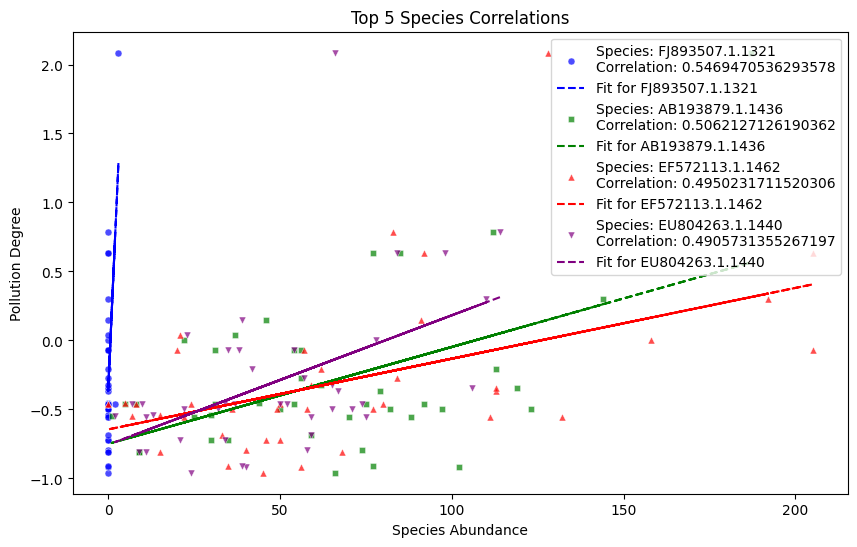

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def plot_line_of_best_fit(x, y, color, label):
    # Fit a first-degree polynomial (line) to the data
    slope, intercept = np.polyfit(x, y, 1)

    # Plot the line of best fit
    plt.plot(x, slope * np.array(x) + intercept, color=color, linestyle='--', label=f'Fit for {label}')

taxonomic_data = pd.read_csv('miTAG_taxonomic_filtered.tsv', delimiter='\t')

x_values = taxonomic_data.iloc[:, 7:].values

correlation_coefficients = {}

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

for row_index in range(len(taxonomic_data)):
    y_values = mapped_data[2].values

    x_row_values = x_values[row_index]

    correlation_coefficient = calculate_correlation(x_row_values, y_values)

    correlation_coefficients[row_index] = correlation_coefficient

sorted_coefficients = sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True)

domain = taxonomic_data.iloc[:, 0].values
phylum = taxonomic_data.iloc[:, 1].values
specie_class = taxonomic_data.iloc[:, 2].values
order = taxonomic_data.iloc[:, 3].values
family = taxonomic_data.iloc[:, 4].values
genus = taxonomic_data.iloc[:, 5].values
specie = taxonomic_data.iloc[:, 6].values

with open("species_coefficient.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        one = domain[row_index]
        two = phylum[row_index]
        three = specie_class[row_index]
        four = order[row_index]
        five = family[row_index]
        six = genus[row_index]
        seven = specie[row_index]
        file.write(f"{one}, {two}, {three}, {four}, {five}, {six}, {seven}, Correlation = {correlation_coefficient}\n")

colors = ['blue', 'green', 'red', 'purple', 'orange']

markers = ['o', 's', '^', 'v', 'D']

plt.figure(figsize=(10, 6))

for i in range(min(top_n, len(sorted_coefficients))):
    row_index, correlation_coefficient = sorted_coefficients[i]
    one = domain[row_index]
    two = phylum[row_index]
    three = specie_class[row_index]
    four = order[row_index]
    five = family[row_index]
    six = genus[row_index]
    seven = specie[row_index]

    x_row_values = x_values[row_index]
    marker = markers[i]
    color = colors[i]

    sns.scatterplot(x=x_row_values, y=y_values, label=f'Species: {seven}\nCorrelation: {correlation_coefficient}',
                    color=color, marker=marker, alpha=0.7, s=25)

    plot_line_of_best_fit(x_row_values, y_values, color, label=seven)

plt.xlabel('Species Abundance')
plt.ylabel('Pollution Degree')
plt.title('Top 5 Species Correlations')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

def calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom):
    x = correlation_coefficient * np.sqrt(degrees_of_freedom) / np.sqrt(1 - correlation_coefficient**2)
    probability = 1 - stats.t.cdf(x, degrees_of_freedom)
    return x, probability

degrees_of_freedom = 39

with open("species_coefficient.txt", "w") as file:
    for row_index, correlation_coefficient in sorted_coefficients:
        one = domain[row_index]
        two = phylum[row_index]
        three = specie_class[row_index]
        four = order[row_index]
        five = family[row_index]
        six = genus[row_index]
        seven = specie[row_index]
        x, probability = calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom)

        file.write(f"{one}, {two}, {three}, {four}, {five}, {six}, {seven}, Correlation = {correlation_coefficient}, x = {x}, Probability = {probability}\n")

In [ ]:
significant_rows = []

total_probability = 0

for row_index, correlation_coefficient in sorted_coefficients:
    one = domain[row_index]
    two = phylum[row_index]
    three = specie_class[row_index]
    four = order[row_index]
    five = family[row_index]
    six = genus[row_index]
    seven = specie[row_index]
    x, probability = calculate_t_value_distribution(correlation_coefficient, degrees_of_freedom)

    if total_probability + probability <= 1:
        significant_rows.append((row_index, seven, correlation_coefficient, x, probability))
        total_probability += probability
    else:
        break

mapped_data = pd.read_csv('mapped.txt', sep='\t', header=None)

second_values = mapped_data[1].values
y_values = mapped_data[2].values

if significant_rows:
    significant_rows = significant_rows[:-1]

with open("significant_species.txt", "w") as file:
    for row_index, seven, correlation_coefficient, x, probability in significant_rows:
        one = domain[row_index]
        two = phylum[row_index]
        three = specie_class[row_index]
        four = order[row_index]
        five = family[row_index]
        six = genus[row_index]
        seven = specie[row_index]
        file.write(f"{one}, {two}, {three}, {four}, {five}, {six}, {seven}, Correlation = {correlation_coefficient}, Probability = {probability}\n")
        #, x = {y_values}